In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/afraca

In [2]:
import os
from glob import glob

In [8]:
data_paths = tf.io.matching_files('dataset/mnist_png/training/*/*.png')
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset/mnist_png/training/0/1.png'>

In [9]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset/mnist_png/training/0/1.png'>

## Load Image

In [10]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

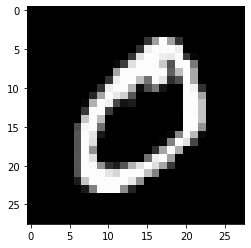

In [12]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

## Set Data Generator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
inputs = image[tf.newaxis, ...]

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

0.0 254.70717 39.72178


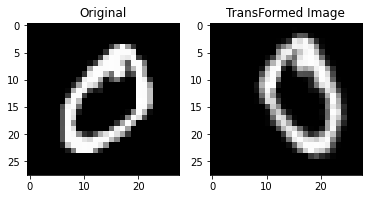

In [19]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('TransFormed Image')
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()


## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

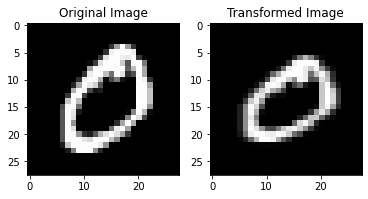

In [39]:
datagen = ImageDataGenerator(
    zoom_range=0.3
)

output = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [12]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)